# Machine Learning with Python

# Exemple : Location de vélos
# Diallo Billo

<p align="center">
  <img width="600" height="200" src="https://img.20mn.fr/E_l1DZgVR-K26DkVcvjpYQ/830x532_velib-paris-illustration.jpg">
</p>

#### **Projet**

Les systèmes de vélo en libre-service sont un moyen de louer des vélos où le processus d'obtention de l'adhésion, de location et de restitution des vélos est automatisé grâce à un réseau de kiosques répartis dans toute la ville. Grâce à ces systèmes, les gens peuvent louer un vélo à un endroit donné et le rendre à un autre endroit en fonction de leurs besoins. Actuellement, il existe plus de 500 programmes de vélo en libre-service dans le monde.

#### **Données du fichier**

* **datetime** : Date et heure en timestamp
* **season** : 4 = été, 3 = printemps, 2 = automns, 1 = hiver 
* **holiday** : Si considéré comme vacance alors 1 sinon 0
* **workingday** : Si le jour est ni un week end ni un jour de vacances
* **weather** : 
    * 1: Clair, Peu de nuages, Partiellement nuageux, Partiellement nuageux
    * 2: Brouillard + nuages, Brouillard + nuages fragmentés, Brouillard + quelques nuages, Brouillard
    * 3: Neige légère, pluie légère + orage + nuages épars, pluie légère + nuages épars
    * 4: Forte pluie + palettes de glace + orage + brume, neige + brouillard 
* **temp** : temperature en degré Celsius
* **atemp** : temperature ressentis en degré Celsius
* **humidity** : humidité relative
* **windspeed** : vitesse du vent
* **casual** : nombre d'utilisateurs non abonnés
* **registered** : nombre d'utilisateurs  abonnés
* **count** : nombre total d'utilisateurs

# Vérification des fichiers à disposition

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings

warnings.filterwarnings("ignore")
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# Any results you write to the current directory are saved as output.

# Importation des packages nécessaires

In [90]:
import numpy as np
import pandas as pd
import seaborn as sn
# from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

### Question préliminaire : 

1. Expliquer rapidement à quoi va servir Pandas?

Réponse question 1: est un outil codé en python permettant la manipulation et l'analyse des données 

2. Expliquer rapidement à quoi va servir numpy?

Réponse question 2: est une bibliothèque pour le langage de programmation de python qui permet la manipulation des matrices ou tableau multidimensionnels.

3. Expliquer rapidement à quoi va servir matplotlib?

Réponse question 3: une bibliothèque de python qui nous permet de tracer et visualiser des données sous forme graphique

4. Expliquer rapidement à quoi va servir seaborn?

Réponse question 4: est une bibliothèque qui créer des graphique statistiques en python.

### Déroulé des questions : 

**Partie 1 exploration et visualisation des données**

Cette première partie permet de vérifier la qualité de la donnée qui sera utiliser pa la suite dans la partie Modélisation. Elle permet aussi de mettre en place une partie important d'un pipeline de Machine Learning, qui est le feature Engineering. Certaines variables ne sont pas exploitable directement par un modèle de ML. Il est donc nécéssaire de les retravailler afin d'en exploiter l'information pertinente. 

La variable à prédire et les variables explicatives doivent être maitrisés et il est donc nécessaire d'investiguer sur le typage, les valeurs manquantes ou encore leur distribution. Cette partie possède de nombreux graphiques utilisés en Data Visusalisation afin d'identifier visuellement certains phénomènes.

La partie redondance de données ou encore doublons est aussi à traiter dans cette première partie.

** Partie 2 modélisation**

Cette seconde partie vise à mettre en place des modèles de Machine Learning. Le process ici sera de tester un modèle simple, puis des modèles plus complexes afin d'en retenir un dans chaque catégorie. La 3eme partie visera à chercher les hyper paramètres et finalement d'obtenir notre modèle final.

## Partie 1 : Visualisation et feature engineering

# Import et description

### Question 1.1

Nous allons mettre un modèle de Machine Learning permettant de prédire le nombre de vélos loués par jour. Supervisé ou non supervisé?



Réponse: modèle supervisé

### Question 1.2
Est on dans une problématique de régression ou de classification?

Réponse: 

### Question 1.3
1. Lire le dataset vlib.csv
2. Décrire le dataset avec .info(), .describe() 
3. Afficher la taille d'un point de vue ligne et colonne de notre dataframe
4. Afficher les 5 premières lignes du DataFrame. Puis afficher les 5 dernières lignes du DataFrame
5. Afficher le noms des colonnes du dataset

In [183]:
df = pd.read_csv("vlib.csv")

In [184]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [185]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [187]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [188]:
df.shape

(10886, 12)

In [189]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### Question 1.4
Pour chaque colonne vérifier si il y a des valeurs manquantes. Par exemple avec .isnull() de pandas. Puis vérifier si il y a des doublons. Vous pouvez utiliser .duplicated()

### Question 1.5
Vérifier si il y a des valeurs manquantes par colonnes/ Faire une boucle et utilise .isnull().

In [190]:
for i in df.columns:
    print(i," : ",df[i].isnull().sum())

datetime  :  0
season  :  0
holiday  :  0
workingday  :  0
weather  :  0
temp  :  0
atemp  :  0
humidity  :  0
windspeed  :  0
casual  :  0
registered  :  0
count  :  0


In [191]:
df.duplicated().sum()

0

### Question 2 :
Etudier les types des données, peux-t-on trouver un schéma de donner plus judicieux ? Y'a t'il des variables avec un typage qui n'est pas optimal?
Identifier ces variables afin de pouvoir les isoler par la suite et les retraiter. Créer un liste avec le nom de ces variables.

............

In [192]:
list_variables = [" humidity","season","weather","holiday","workingday"]

### Question 3.1 :
Etudier la variable datetime, quelles features peut-t-on créer/extraire avec cette variable ? La variable datetime n'est pas exploitable tel quel. Cependant il est possible d'extraire des informations de celle ci. Comme le mois, le jour ou encore l'heure. Il est tout à fait cohérent de penser que ces variables joueront un rôle dans la prédiction du nombre de vélos loués par jour.

Extraire date, hour, weekday et month. Pour cela vous utiliserez la fonction .apply(lambda x: ...). L'idée ici est de découper les informations dans le datetime et d'isoler les informations qui nous intéresse afin d'en créer des nouvelle variable.

1. Séparer de datetime la partie date et hour. Stocké respectivement dans la colonne "date" et "hour" du DataFrame. Proposer un algorithme permettant de le faire. Puis implémenter le. exemple: "2011-01-01 00:00:00".split()
2. De la nouvelle variable "hour" appliquer la fonction .apply() afin d'isoler l'heure. Comment isoler l'heure de notre variable "hour"?
3. De la variable date, nous voulons extraire le mois, le jour et si oui on c'est un weekend. Pour cela nous allons utiliser le package calendar dont voici un exemple de syntaxe:
dailyData.date.apply(lambda x : calendar.day_name[datetime.strptime(x,"%Y-%m-%d").function()]) - Trouver la fonction() permettant d'identifier le jour de la semaine puis celle pour le mois. Stocker ces nouvelles variables dans "weekday" & "month"


Exemples: 
- datetime.strptime("2011-01-01","%Y-%m-%d").weekday()
- calendar.day_name[datetime.strptime("2011-01-01","%Y-%m-%d").weekday()]

In [193]:
"2011-01-01 00:00:00".split()

['2011-01-01', '00:00:00']

In [194]:
df["date"] = df.datetime.apply(lambda x : x.split()[0])
df["date"]

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
10881    2012-12-19
10882    2012-12-19
10883    2012-12-19
10884    2012-12-19
10885    2012-12-19
Name: date, Length: 10886, dtype: object

In [195]:
df["hour"] = df.datetime.apply(lambda x : x.split()[1])
df["hour"]

0        00:00:00
1        01:00:00
2        02:00:00
3        03:00:00
4        04:00:00
           ...   
10881    19:00:00
10882    20:00:00
10883    21:00:00
10884    22:00:00
10885    23:00:00
Name: hour, Length: 10886, dtype: object

In [196]:
df["hour"] = df.datetime.apply(lambda x : x.split()[1].split(":")[0])
df["hour"] 

0        00
1        01
2        02
3        03
4        04
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: hour, Length: 10886, dtype: object

In [197]:
import calendar
df["weekday"] = df.date.apply(lambda x : calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])

df["month"] = df.date.apply(lambda x : calendar.month_name[datetime.strptime(x,"%Y-%m-%d").month])

In [198]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


### Question 3.2 :
Remplacer les catégories des variables "season" and "weather" par des catégories plus explicite. Voir la partie Données du fichier en début de notebook. Pour cela utiliser la fonction .map(dict) avec le dictionnaire adéquat.

1. Créer le dictionnaire
2. Appliquer le remplacement avec .map()

Exemple:
- dictionnaire_saisons = {2: "Spring", 3 : "Summer", 4 : "Fall", 1 :"Winter" }

In [199]:
dictionnaire_saisons = {2: "automns", 3 : "printemps", 4 : "été", 1 :"hiver" }
df["season"] = df.season.map(dictionnaire_saisons)

df["weather"] = df.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [200]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,hiver,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,2011-01-01 01:00:00,hiver,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,2011-01-01 02:00:00,hiver,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,2011-01-01 03:00:00,hiver,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,2011-01-01 04:00:00,hiver,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


### Question 4 :
Transformer les variables qui devraient être catégorielles en variables catégorielles en utilisant pandas. Pour faire cela rapidement il est possible d'utiliser la fonction .astype(). Elle s'applique sur les colonnes du DataFrame.

Faire une boucle à partir de la liste des variables identifier comme n'ayant pas le bon typage et les assigner àu typage "category". N'oubliez pas de mettre à jour la liste des variables catégorielles avec les nouvelles features crées.

Supprimer la variable inutile, celle dont nous avons extrait les informations pertinentes

In [201]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    df[var] = df[var].astype("category")

In [202]:
dropFeatures = ["atemp"]

df  = df.drop(dropFeatures, axis=1) # Suppression d'une colonne

# Statistiques

### Question 5.1
Les valeurs aberrantes ou outliers, doivent être traitées ou du moins identifier. Il existe de nombreuses méthodes pour le faire: Tests Statistiques, Machine Learning ou statistiques basiques. Ici nous commencerons par utiliser un calcul basique se basant sur la variance et la moyenne.

Dans un premier temps nous allons utiliser des boxplot afin de les identifier visuellement. Utiliser Seaborn pour afficher les boxplot de la variable "count", puis "count" par "season", "count" par "weekday" et "count" par "hour".

https://seaborn.pydata.org/generated/seaborn.boxplot.html

<p align="center">
  <img width="600" height="200" src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png">
</p>

<p align="center">
  <img width="600" height="200" src="https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2013/09/how-to-find-outliers.jpg">
</p>


[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Box Plot On Count')]

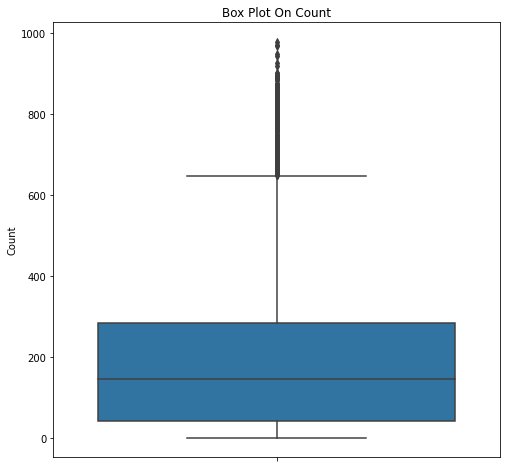

In [203]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sn.boxplot(data=df,y="count",orient="v",ax=axes)

axes.set(ylabel='Count',title="Box Plot On Count")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Season'),
 Text(0.5, 1.0, 'Box Plot On Count Across Season')]

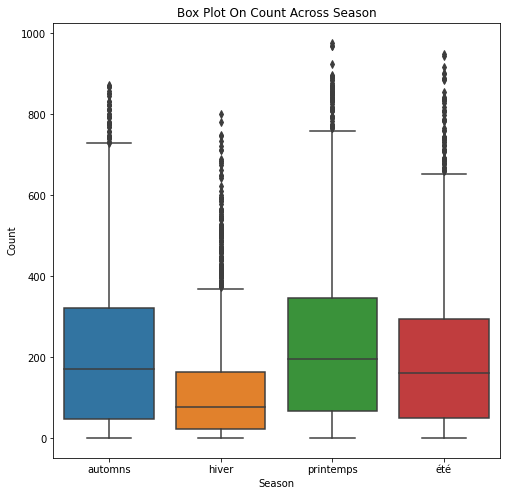

In [204]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sn.boxplot(data=df,y="count",x="season",orient="v",ax=axes)
axes.set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Hour Of The Day')]

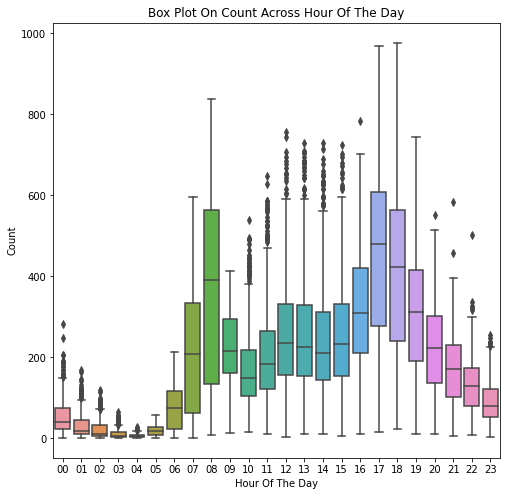

In [205]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sn.boxplot(data=df,y="count",x="hour",orient="v",ax=axes)
axes.set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

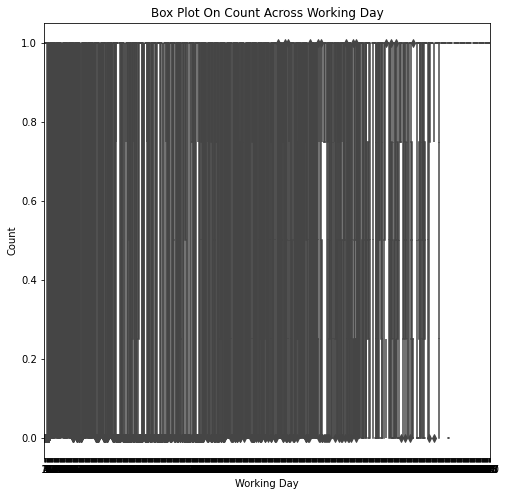

In [206]:
df["workingday"] = df["workingday"].astype("int")
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sn.boxplot(data=df,y="workingday",x="count",orient="v",ax=axes)
axes.set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

### Question 5.2

Pour l'approche basique nous associerons les outliers de "count" à des individus qui ne respecte pas la fonction suivante: np.abs(dailyData["count"] - dailyData["count"].mean()) <= (3 * dailyData["count"].std())

1. Création d'un nouveau DataFrame appelé df_without_outliers par exemple partant du DataFrame original en filtrant sur les outliers tels qu'ils sont définis ci dessus.
2. Combien d'outliers à-t-on filtré ?

In [207]:
df_without_outliers = df[
    np.abs(df["count"] - df["count"].mean()) <= (3 * df["count"].std())
] 

In [208]:
df.shape[0] - df[np.abs(df["count"] - df["count"].mean()) <= (3 * df["count"].std())].shape[0]

147

In [209]:
print ("Shape Of The Before Ouliers: ",df.shape)
print ("Shape Of The After Ouliers: ",df_without_outliers.shape)

Shape Of The Before Ouliers:  (10886, 15)
Shape Of The After Ouliers:  (10739, 15)


### Question 6
L'étude de la corrélation fait partie aussi de la vérification de la qualité de la donnée. Cela peut permettre à la fois d'identifier un redondance d'information ou encore des variables qui sont induites de notre variables cible, dépendante de celle ci.

Etudier les corrélations entre les différentes variables grâce à la fonction, Quelles variables sont très corrélées ? Visualiser ces corrélations grâce à la fonction heatmap de seaborn.

1. Identfiier les variables trops corrélés
2. Faut il supprimer des variables de notre jeux de données avant de passer à l'étape de Machine Learning? Attention à la fuite de donnée - Data Leakage. Identifier ce qu'est le Data Learkage.
3. Afficher le graphique regplot() de seaborn avec les variables "count" et "registered" 

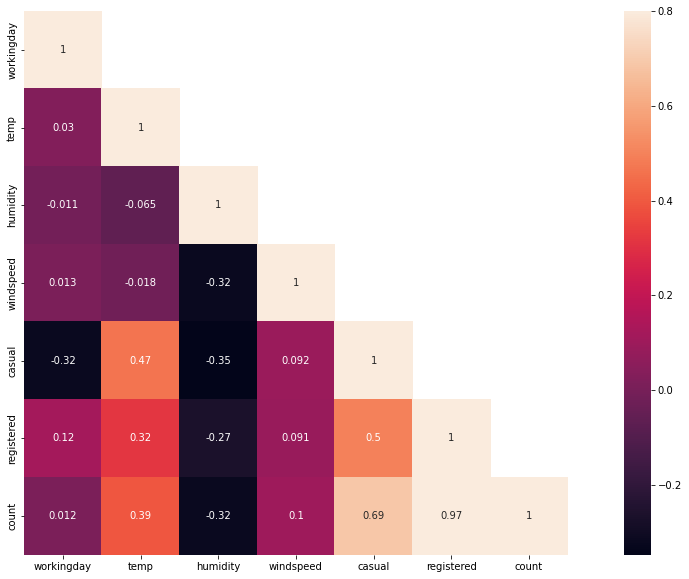

In [210]:
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

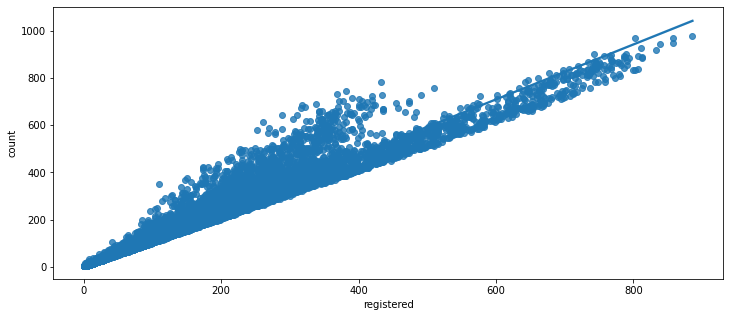

In [211]:
fig,ax = plt.subplots()
fig.set_size_inches(12, 5)
sn.regplot(x="registered", y="count", data=df,ax=ax)

### Question 7
Nous avons une variable temporelle dans notre jeu de données. Afin de vérifier la cohérence de la donnée et de vérifier certaines hypothéses, afficher l'évolution du nombre de vélo par jour par heures pour les 4 saisons, les jours de la semaine et pour la variable "weekday". pointplot() de seborn.

Afficher un diagramme à bar permmettant de mettre en avant le nombre de vélo loué par mois. barplot() de seaborn. 

1. Aggréger la donnéé count par dimension: Season, mois, weekday. Pour cela vous utiliserez cette syntaxe: featureAggregated = pd.DataFrame(df.groupby("feature")["count"].mean()).reset_index(). Ici la dimension est "feature"
2. Faire la même chose avec deux dimensions: Hour + season, Hour + mois, hour + weekday. ici feature = ["col1", "col2"]

In [212]:
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
monthAggregated = pd.DataFrame(df.groupby("month")["count"].mean()).reset_index()

[Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Average Count By Month')]

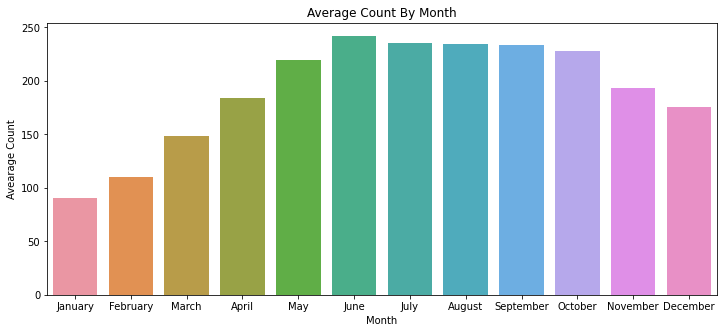

In [213]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)

sn.barplot(data=monthAggregated,x="month",y="count",ax=ax,order=sortOrder)
ax.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

In [214]:
hourAggregated = pd.DataFrame(df.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Season'),
 None]

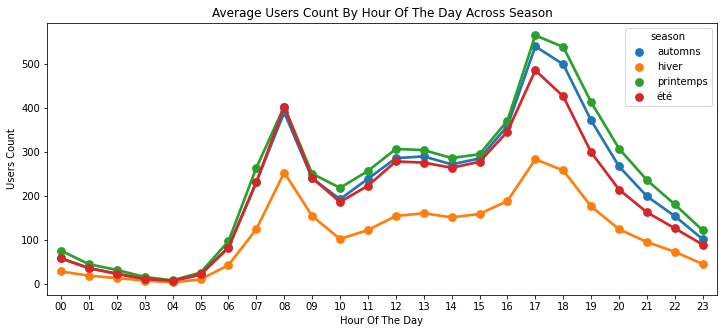

In [215]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

In [216]:
hourAggregated = pd.DataFrame(df.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Weekdays'),
 None]

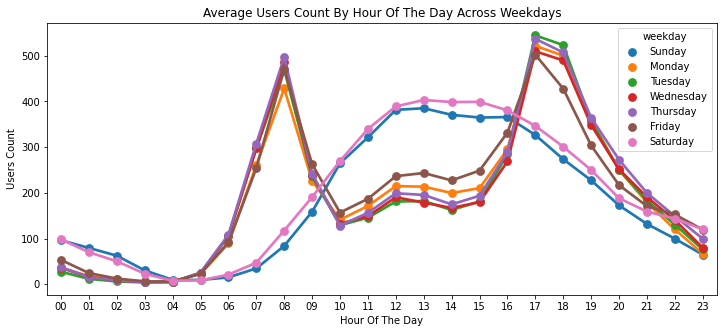

In [217]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)

sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

In [218]:
hourTransformed = pd.melt(df[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
hourAggregated.head()

,hour,variable,value
0,00,casual,10.312088
1,00,registered,44.826374
2,01,casual,6.513216
3,01,registered,27.345815
4,02,casual,4.819196


[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

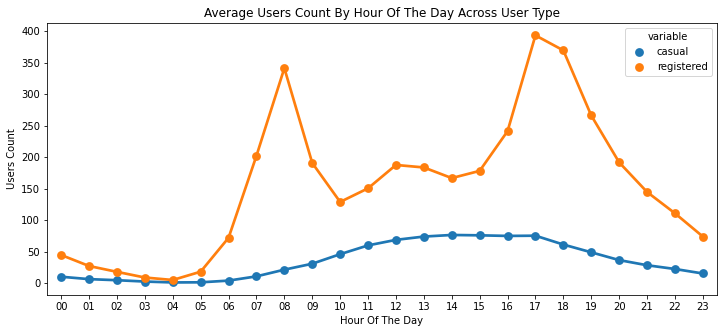

In [219]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)

sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

Que dire de la variable mois? saison? et Weekday? Semblent-elles pertinentes pour la prédiction de "count"?

## Partie 2 : Modélisation

Maintenant que nous avons traité notre fichier et que nous avons notre SmartData, nous allons pouvoir commencer par mettre en place notre pipeline de Machine Learning.

### Question 1.1
Verifier que vous avez supprimé les variable inutiles ou qui se déduisent de la variable cible. Il y en a 3 ou 4 à supprimer.

In [220]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'date',
       'hour', 'weekday', 'month'],
      dtype='object')

In [221]:
dropFeatures = ["holiday","date","datetime"]
df = df.drop(dropFeatures, axis=1)

### Question 1.2 :
Les variables catégorielles doivent être traités pour être utilisable par des modèles linéaires. Pour cela il faut créer une variable par catégorie. 
1. Utiliser data = pd.get_dummies(data,columns=["nom_col]) pour transformer les variables catégorielles que vous avez identifés
2. Afficher les noms des colonnes du DataFrame

In [222]:
df = pd.get_dummies(df,columns=["hour"])
df = pd.get_dummies(df,columns=["weekday"])
df = pd.get_dummies(df,columns=["month"])
df = pd.get_dummies(df,columns=["season"])
df = pd.get_dummies(df,columns=["weather"])
df.columns

Index(['workingday', 'temp', 'humidity', 'windspeed', 'casual', 'registered',
       'count', 'hour_00', 'hour_01', 'hour_02', 'hour_03', 'hour_04',
       'hour_05', 'hour_06', 'hour_07', 'hour_08', 'hour_09', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'month_April', 'month_August', 'month_December',
       'month_February', 'month_January', 'month_July', 'month_June',
       'month_March', 'month_May', 'month_November', 'month_October',
       'month_September', 'season_automns', 'season_hiver', 'season_printemps',
       'season_été',
       'weather_ Clear + Few clouds + Partly cloudy + Partly cloudy',
       'weather_ Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog ',
       'weather_ Light Snow

In [223]:
df.head()

,workingday,temp,humidity,windspeed,casual,registered,count,hour_00,hour_01,hour_02,...,month_October,month_September,season_automns,season_hiver,season_printemps,season_été,weather_ Clear + Few clouds + Partly cloudy + Partly cloudy,"weather_ Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog","weather_ Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weather_ Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,9.84,81,0.0,3,13,16,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,9.02,80,0.0,8,32,40,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,9.02,80,0.0,5,27,32,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,0,9.84,75,0.0,3,10,13,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,9.84,75,0.0,0,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


### Question 2.1
Randomiser les données et séparer le jeu de données. Verifier la taille de vos 2 sous ensembles train / test. Pour cela vous allez utiliser la fonction train_test_split de scikit learn.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html. Ajouter une graine avec random_state pour que l'échantillonnage se fait de la même manière à chaque lancement du code.

Dans notre exemple nous prendre 80% d'individus pour le train et 20% pour le test.

1. Importer sklearn
2. importer train_test_split()
2. Utiliser train_test_plit()

Pour rappel notre variable à prédire est "count" et le reste est considéré comme variables prédictives. Il est necessaire d'isoler la variable à prédire dans une nouvelle variable Y et les variables prédictives dans une variable X avant d'utiliser le train_test_split().

![](https://miro.medium.com/max/2272/1*-8_kogvwmL1H6ooN1A1tsQ.png)

In [225]:
import sklearn
from sklearn.model_selection import train_test_split

# Variables Descr
X = df.drop('count', axis=1)

# Variable à prédire
Y = df['count']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [226]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(8708, 57) (2178, 57)
(8708,) (2178,)


### Question 2.2
Avant de mettre en palce un modèle, nous devons définir une métrique qui va nous permettre de comparer les différents modèles entre eux afin de définir le plus pertinent mais aussi afin de juger de la qualité prédictive de notre modèle final.

Pour cela imprter metrics de sklearn. Nous utiliserons le R2 (r2_score) qui est le coefficient de détermination et calcul la corrélation au carré entre la réalité et la prédiction puis une métrique que nous allons créer. Il est toujours intéréssant d'avoir plusieurs métriques pour comparer nos modèles.

1. importer metrics
2. Remplir la fonction mae 

![](https://slideplayer.fr/slide/3308585/11/images/14/COEFFICIENT+DE+DETERMINATION+-+R%C2%B2.jpg)

In [227]:
# Métrique à créer
from sklearn import metrics

def rmse(y, y_):
    return np.sqrt(np.mean((y-y_)**2))

def mae(y, y_):
    return np.mean(np.abs(y-y_))

Maintenant que nous avons défini nos 2 métriques, nous allons commencer par utiliser un "modèle" très bête! Le modèle appliquant la moyenne ou la médiane à chaque individu dont nous voulons prédire le nombre de vélo qui sera loués.

L'hsitorique - l'échantillon d'apprentissage, possède à la fois les variables explicatives et la variable à expliquer. Ainsi l'apprentissage d'un DummyRegressor ce fait de la manière suivante: Calcul de la moyenne ou de la médiane de y_train puis application de cette valeur à l'ensemble des X_test. Ainsi pour calculer la performance de notre modèle nous allons comparer y_test et y_pred, qui correspond à la moyenne ou la médiane de ce que l'on trouve dans l'échantillon d'apprentissage.

1. Appliquer Dummyregressor afin d'avoir une baseline - https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html. 
2. Calculer les métriques associées à ce regresseurs.

In [228]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")

dummy_regr.fit(X_train, Y_train)

y_pred = dummy_regr.predict(X_test)

print("R2: ", metrics.r2_score(Y_test, y_pred))
print("MAE: ", mae(Y_test, y_pred))

R2:  -0.0006510857800061665
MAE:  145.49826932624362


### Question 3.1
1. Tester un premier modèle simple : la régression linéaire. Réaliser un graphe permettant de voir visuellement la qualité de ce modèle. Par exemple scatter de matplotlib permettant de croiser les y_test et les y_pred.
2. Afficher les métriques associées à ce nouveau régresseur

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

![](https://image.slidesharecdn.com/regresslineairesimpleimp-140113164038-phpapp02/95/regress-lineaire-simple-imp-42-638.jpg?cb=1389631325)

In [229]:
from sklearn.linear_model import LinearRegression
lModel = LinearRegression()
lModel.fit(X=X_train, y=Y_train)

y_pred = lModel.predict(X= X_test)

print("R2: ", metrics.r2_score(Y_test, y_pred))
print("MAE: ", mae(Y_test, y_pred))

R2:  1.0
MAE:  1.5032827548842295e-13


### Question 3.2
Utiliser - D'autres modèles linéaires - Ridge, Lasso. Réutiliser le code développé ci dessus pour affiché les métriques associés à nos nouveaux régresseurs.

https://scikit-learn.org/stable/modules/linear_model.html

![](https://miro.medium.com/max/602/1*QVzTd8Top6ImHR-3U3QdqQ.png)

### LASSO & RIDGE
![](https://miro.medium.com/max/1142/1*T-DWh1s4XG6I_bVH9bj1Dw.png)

In [230]:
from sklearn.linear_model import Ridge

lModel = Ridge()
lModel.fit(X=X_train, y=Y_train)

y_pred = lModel.predict(X= X_test)

print("R2: ", metrics.r2_score(Y_test, y_pred))
print("MAE: ", mae(Y_test, y_pred))

R2:  0.9999999999999997
MAE:  2.378886626313438e-06


In [232]:
from sklearn.linear_model import Lasso
lModel = Lasso()
lModel.fit(X=X_train, y=Y_train)

y_pred = lModel.predict(X= X_test)

print("R2: ", metrics.r2_score(Y_test, y_pred))
print("MAE: ", mae(Y_test, y_pred))

R2:  0.9999999872551744
MAE:  0.01387672856979782


### Question 3.3
Utiliser - Des modèles non linéaires tel que les arbres de décision (DecisionTree), RandomForest, ExtrTrees. Réutiliser le code développé ci dessus pour affiché les métriques associés à nos nouveaux régresseurs.

- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random%20forest#sklearn.ensemble.RandomForestRegressor

### Arbre de décision
![](https://upload.wikimedia.org/wikipedia/commons/b/b7/Arbre_de_decision.jpg)

### Random Forest
![](https://i.stack.imgur.com/iY55n.jpg)

In [233]:
from sklearn import tree

lModel = tree()
lModel.fit(X=X_train, y=Y_train)

y_pred = lModel.predict(X= X_test)

print("R2: ", metrics.r2_score(Y_test, y_pred))
print("MAE: ", mae(Y_test, y_pred))

TypeError: ignored

In [234]:
from sklearn.ensemble import RandomForestRegressor

lModel = RandomForestRegressor()
lModel.fit(X=X_train, y=Y_train)

y_pred =lModel .predict(X= X_test)

print("R2: ", metrics.r2_score(Y_test, y_pred))
print("MAE: ", mae(Y_test, y_pred))

R2:  0.9997245809661542
MAE:  1.2212488521579432


In [235]:
from sklearn.ensemble import ExtraTreesRegressor

lModel = ExtraTreesRegressor()
lModel.fit(X=X_train, y=Y_train)

y_pred = lModel.predict(X= X_test)

print("R2: ", metrics.r2_score(Y_test, y_pred))
print("MAE: ", mae(Y_test, y_pred))

R2:  0.999771461634961
MAE:  0.9738292011019288


### Question 3.4
Utiliser - un modèle de Gradient boosting. Réutiliser le code développé ci dessus pour affiché les métriques associés à nos nouveaux régresseurs.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

### Gradient Boosting
![](https://www.researchgate.net/profile/Maria_Peraita-Adrados/publication/326379229/figure/fig5/AS:647978477948928@1531501516288/A-simple-example-of-visualizing-gradient-boosting.png)

In [236]:
from sklearn.ensemble import GradientBoostingRegressor

lModel =GradientBoostingRegressor()
lModel.fit(X=X_train, y=Y_train)

y_pred = lModel.predict(X= X_test)

print("R2: ", metrics.r2_score(Y_test, y_pred))
print("MAE: ", mae(Y_test, y_pred))

R2:  0.9991642055980591
MAE:  3.392300680019708


L'ensemble des modèles utilisés ont des paramètres. Ici nous les avons testés avec les paramètres par défaut. Cela nous a permit de voir quel type de modèle performé le mieux. Nous allons maintenant sélectionner celui qui est le plus prometteur et tester différents bunch de paramètres afin de trouver les Hyper paramlètres de notre modèle. C'est à dire les paramètres qui permettent à notre modèle d'être encore meilleur.

### Question 4 : Sélection de modèle
Choisir 1 modèle linéaire, 1 modèle de type arbre de décision et un modèle de gradient boosting. Puis effectuer un GridSearchCV avec une cross-validation (avec K=5) pour chacun des modèles choisi.
Afficher les meilleurs paramètres pour chacun des modèles ainsi que les résultats sur le sous ensemble train. 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

** Cross-Validation for Linear Regression, Ridge & Lasso **

In [237]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

lm = LinearRegression()
mae_scorer = metrics.make_scorer(mae, greater_is_better=False)

# Train the model with 10-folds
# Warning : without `scoring` parameter it returns a R2 score ! 
scores = cross_val_score(lm, scaler.fit_transform(X_train), Y_train, cv=10)#, scoring=mae_scorer) 
print("Cross-validated scores:", scores.mean())

Cross-validated scores: 0.9997776026391051


In [238]:
# RIDGE
lm = Ridge()
mae_scorer = metrics.make_scorer(mae, greater_is_better=False)

# Train the model with 10-folds
# Warning : without `scoring` parameter it returns a R2 score ! 
scores = cross_val_score(lm, scaler.fit_transform(X_train), Y_train, cv=10)#, scoring=mae_scorer) 
print("Cross-validated scores:", scores.mean())

Cross-validated scores: 0.9999999689127431


In [ ]:
# idem pour LASSO

Que se passe t'il pour la régression linéaire standard?

** GridSearch for Ridge Regression **

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [239]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_m_ = Ridge()
ridge_params_ = {'alpha':[25, 30,35, 40, 50, 60, 70, 100, 1000]}
#rmsle_scorer = metrics.make_scorer(rmse, greater_is_better=False)
grid_ridge_m =  GridSearchCV(ridge_m_, 
                            ridge_params_, 
                            #scoring = rmsle_scorer,
                            cv=5)

grid_ridge_m.fit(X_train, Y_train)
preds = grid_ridge_m.predict(X=X_test)

print ("Best parameters:",grid_ridge_m.best_params_)
print ("R2 Value For Ridge Regression: ", metrics.r2_score(Y_test, preds))
print ("RMSE Value For Ridge Regression: ", rmse(Y_test, preds))
print ("MAE Value For Ridge Regression: ", mae(Y_test, preds))

Best parameters: {'alpha': 25}
R2 Value For Ridge Regression:  0.9999999999997876
RMSE Value For Ridge Regression:  8.537504009964324e-05
MAE Value For Ridge Regression:  5.7563361819842524e-05


Afficher les résultats du GridsearchCV, Quelles sont les informations pertinentes ici pour choisir notre modèle? 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [240]:
pd.DataFrame(grid_ridge_m.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017810,0.002759,0.004325,0.001510,25,{'alpha': 25},1.0,1.0,1.0,1.0,1.0,1.0,1.814547e-14,1
1,0.015922,0.000132,0.003517,0.000030,30,{'alpha': 30},1.0,1.0,1.0,1.0,1.0,1.0,2.605833e-14,2
2,0.019679,0.006401,0.003561,0.000099,35,{'alpha': 35},1.0,1.0,1.0,1.0,1.0,1.0,3.530303e-14,3
3,0.016404,0.001373,0.003807,0.000693,40,{'alpha': 40},1.0,1.0,1.0,1.0,1.0,1.0,4.597972e-14,4
4,0.016041,0.000624,0.004058,0.001129,50,{'alpha': 50},1.0,1.0,1.0,1.0,1.0,1.0,7.145798e-14,5
5,0.015662,0.000203,0.003442,0.000044,60,{'alpha': 60},1.0,1.0,1.0,1.0,1.0,1.0,1.024400e-13,6
6,0.015514,0.000156,0.003485,0.000047,70,{'alpha': 70},1.0,1.0,1.0,1.0,1.0,1.0,1.389536e-13,7
7,0.015952,0.000758,0.003553,0.000202,100,{'alpha': 100},1.0,1.0,1.0,1.0,1.0,1.0,2.818567e-13,8
8,0.015730,0.000480,0.003427,0.000083,1000,{'alpha': 1000},1.0,1.0,1.0,1.0,1.0,1.0,2.936206e-11,9


Réponse:

Afficher l'évolution du score selon le paramètre testé pour la regrssion ridge. (alpha)

KeyError: ignored

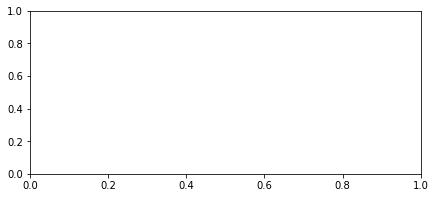

In [248]:
# Plot scores
fig,ax= plt.subplots()
fig.set_size_inches(7,3)
df = pd.DataFrame(grid_ridge_m.cv_results_)[['params','mean_test_score']]
df["alpha"] = df["params"].apply(lambda x:x[])
df["r2"] = df["mean_test_score"].apply(lambda x:-x)
sn.pointplot(data=df,x="alpha",y="r2",ax=ax)

** GridSearch modèle Lasso **

In [243]:
from sklearn.linear_model import Lasso

lasso_m_ = Lasso()

alpha  = 1/np.array([1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'alpha':alpha}
grid_lasso_m = GridSearchCV(lasso_m_,
                            lasso_params_,
                            #scoring = rmsle_scorer,
                            cv=5)

grid_lasso_m.fit(X_train, Y_train)
preds = grid_lasso_m.predict(X=X_test)

print ("Best parameters:", grid_lasso_m.best_params_)
print ("R2 Value For Lasso Regression: ", metrics.r2_score(Y_test, preds))
print ("RMSE Value For Lasso Regression: ", rmse(Y_test, preds))
print ("MAE Value For Lasso Regression: ", mae(Y_test, preds))

Best parameters: {'alpha': 0.0011111111111111111}
R2 Value For Lasso Regression:  0.9999999999999788
RMSE Value For Lasso Regression:  2.6984769104949762e-05
MAE Value For Lasso Regression:  2.2036064544200097e-05


Afficher l'évolution du score selon le paramètre testé pour la regrssion Lasso. (alpha)

NameError: name 'grid_lasso_m' is not defined

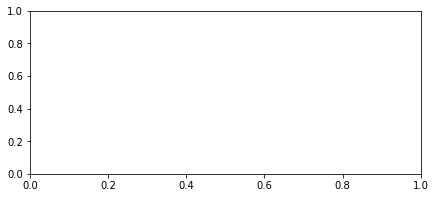

In [ ]:
# Plot scores
fig,ax= plt.subplots()
fig.set_size_inches(7,3)
df = pd.DataFrame(grid_lasso_m.cv_results_)[['params','mean_test_score']]
df["alpha"] = df["params"].apply(lambda x:x[])
df["r2"] = df["mean_test_score"].apply(lambda x:x)
sn.pointplot(data=df,x="alpha",y="r2",ax=ax)

** GridSearch modèle Random Forest **

In [247]:
from sklearn.ensemble import RandomForestRegressor
rf_Model =  RandomForestRegressor()

rf_params = { 'n_estimators':[150],'max_depth':[2, 3, 5, 7, 9, 12, 15, 17, 20]}
grid_rf_m = GridSearchCV(rf_Model, 
                         rf_params, 
                         #scoring=rmsle_scorer, 
                         cv=5)

grid_rf_m.fit(X_train, Y_train)
preds = grid_rf_m.predict(X=X_test)

print ("Best parameters:", grid_rf_m.best_params_)
print ("R2 Value For Random Forest: ", metrics.r2_score(Y_test, preds))
print ("RMSE Value For Random Forest: ", rmse(Y_test, preds))
print ("MAE Value For Random Forest: ", mae(Y_test, preds))

Best parameters: {'max_depth': 17, 'n_estimators': 150}
R2 Value For Random Forest:  0.9997071794865421
RMSE Value For Random Forest:  3.170432610834336
MAE Value For Random Forest:  1.21146135250895


Afficher l'évolution du score selon le paramètre max_depth.

NameError: name 'grid_rf_m' is not defined

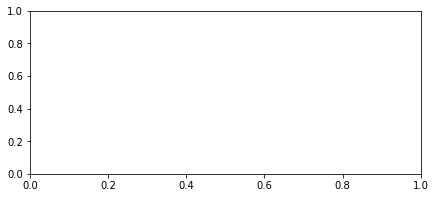

In [ ]:
# Plot scores
fig,ax= plt.subplots()
fig.set_size_inches(7,3)
df = pd.DataFrame(grid_rf_m.cv_results_)[['params','mean_test_score']]
df["max_depth"] = df["params"].apply(lambda x:x["____"])
df["r2"] = df["mean_test_score"].apply(lambda x:x)
sn.pointplot(data=df,x="max_depth",y="r2",ax=ax)

** GridSearch modèle Gradient Boosting **

In [249]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()

gbm_params = { 'n_estimators':[500], 'learning_rate':[0.001 ,0.01, 0.1]}
grid_gbm = GridSearchCV(gbm, 
                        gbm_params, 
                        #scoring=rmsle_scorer, 
                        cv=5)

grid_gbm.fit(X_train, Y_train)
preds = grid_gbm.predict(X=X_test)

print ("Best parameters:",grid_gbm .best_params_)
print ("R2 Value For Gradient Boosting: ", metrics.r2_score(Y_test, preds))
print ("RMSE Value For Gradient Boosting: ", rmse(Y_test, preds))
print ("MAE Value For Gradient Boosting: ", mae(Y_test, preds))

Best parameters: {'learning_rate': 0.1, 'n_estimators': 500}
R2 Value For Gradient Boosting:  0.9997248214357999
RMSE Value For Gradient Boosting:  3.07344239557248
MAE Value For Gradient Boosting:  1.912030417192215


Avec pd.DataFrame(grid_ridge_m.cv_results_) nous pouvons récupérer un tas de métriques selon les paramètres testés. Il est intéressant d'afficher l'impact d'un paramètre sur la métrique afin d'identifier ceux qui mérite d'être creusés plus que d'autres.

Afficher l'évolution selon un paramètre sélectionné, faire cela pour les derniers modèles choisi

NameError: name 'grid_ridge_m' is not defined

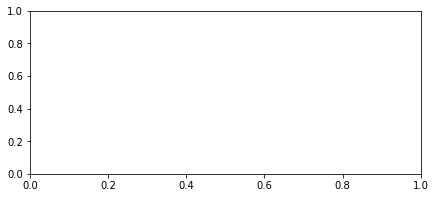

In [ ]:
# Plot scores
fig,ax= plt.subplots()
fig.set_size_inches(7,3)
df = pd.DataFrame(grid_ridge_m.cv_results_)[['params','mean_test_score']]
df["alpha"] = df["params"].apply(lambda x:x[_________])
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)
sn.pointplot(data=df,x=_________,y=_________,ax=ax)

### Question 5 : Conclusion
Identifier le meilleur modèle et ré-entrainer le modèle avec ses paramètres optimaux. 
Afficher les résultats sur le sous ensemble de test. Utiliser cross_val_score, puis reprendre le code ou le train_test_split a été réalisé. Appliquer votre modèle sur X_train, y_train et testé sur X_test.

![](https://camo.githubusercontent.com/64139b0aad34b1a5e2e7d853fd4a5a32fca96ad4/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f312a726762613142494f5579733777516358634c345535412e706e67)


In [ ]:
lm = ______(max_depth= ______, n_estimators= ______)

# Warning : without `scoring` parameter it returns a R2 score ! 
scores = cross_val_score(lm, X_train, Y_train, cv=5)
print("Cross-validated scores:", scores.mean())

NameError: name '______' is not defined

In [ ]:
lm.fit(______, ______)
y_pred = lm.predict(X_test)

print("R2: ", metrics.r2_score(______, y_pred))
print("MAE: ", mae(Y_test, ______))

NameError: name '______' is not defined

Pour avoir un modèle plus robuste il faudrait réaliser plusieurs cross validation pour obtenir plusieurs modèles puis terminer par un vote ou une moyenne des différents modèles obtenus.

# Question Bonus:
- Utiliser XGB, LGBM & CatBoost

In [ ]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor(verbose = 0, cat_features = ['workingday','hour'])

cb.fit(_____, Y_train)
y_pred = cb.predict(_____)

# Warning : without `scoring` parameter it returns a R2 score ! 
scores = _____(cb, X_train, Y_train, cv=5)

print("Cross-validated scores:", _____)

print("R2: ", metrics.r2_score(_____, _____))
print("MAE: ", _____)

NameError: name '_____' is not defined

In [ ]:
import lightgbm as lgb

lgb_train = lgb.Dataset(_____, Y_train)
lgb_test = lgb.Dataset(X_test, _____, reference=lgb_train)

params = {
    'num_leaves': 5,
    'metric': ['l1', 'l2'],
    'verbose': -1,
    'n_estimators': _____
}

evals_result = {}  # to record eval results for plotting
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],
                feature_name=['f' + str(i + 1) for i in range(X_train.shape[-1])],
                categorical_feature=[21],
                evals_result=evals_result,
                verbose_eval=0)

y_pred = _____

print("R2: ", _____)
print("MAE: ", _____)

NameError: name '_____' is not defined

In [ ]:
import xgboost as xgb

X_train['hour'] = X_train['hour'].astype('int8')
X_train['workingday'] = X_train['workingday'].astype('int8')

X_test['hour'] = X_test['hour'].astype('int8')
X_test['workingday'] = X_test['workingday'].astype('int8')

#gbmdata_dmatrix = xgb.DMatrix(data=X_train, label=Y_train)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.9, learning_rate = 0.1, n_estimators = _____)

xg_reg._____
y_pred = _____

print("R2: ", _____)
print("MAE: ", _____)

NameError: name 'X_train' is not defined